<a href="https://colab.research.google.com/github/ltoosaint24/DS-Unit-2-Kaggle-Challenge/blob/master/Loveline_Toussaint_DS_Sprint_Challenge_22_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_

---

👇 **Do not change the code in this cell.** If you're working in Google Colab, you can run this cell to install `category_encoders`.

In [375]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders

 
# Sprint Challenge: Predict Steph Curry's Shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts from October 2009 through June 2019 (regular season and playoffs). The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

You'll create a model to predict whether Curry will make a shot based on his past perfomance.

# Directions

This notebook contains 10 tasks, which cover the material we've learned in this sprint. Here's a summary:

- **Task 1:** Importing data.
- **Task 2:** Feature engineering.
- **Task 3:** Splitting data into a feature matrix and target vector.
- **Task 4:** Splitting data into training, validation, and test sets.
- **Task 5:** Establishing baseline accuracy.
- **Task 6:** Building a model with a transformer and a tree-based predictor.
- **Task 7:** Calculating training and validation accuracy.
- **Task 8 (`stretch goal`):** Tuning model hyperparameters.
- **Task 9:** Calculating precision and recall from a confusion matrix.
- **Task 10 (`stretch goal`):** Plotting a confusion matrix.

For each task you should do the following:

- Read the task instructions.
- Write your code in the cell below the task. Delete the `raise 
NotImplementedError` before your start.
- Run the testing cell below the task. If you get an error, read the error message and re-evaluate your code.

**You should limit your code to the following libraries:**

- `category_encoders`
- `numpy`
- `matplotlib`
- `pandas`
- `sklearn`



# I. Wrangle Data

**Task 1:** Change the code below to import your dataset. Be sure to examine the columns carefully and determine if one of them should be set at the index. 

In [376]:
'''T1. Import DataFrame `df`'''

import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url)
df


,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0
2,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,Regular Season,-4.0
3,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,Regular Season,-4.0
4,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,Regular Season,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13953,41800403,570,Stephen Curry,4,8,1,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,12,3,120,1,2019-06-05,GSW,TOR,Playoffs,-13.0
13954,41800403,573,Stephen Curry,4,7,16,Floating Jump shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,11,114,-5,0,2019-06-05,GSW,TOR,Playoffs,-14.0
13955,41800403,602,Stephen Curry,4,5,27,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-217,149,0,2019-06-05,GSW,TOR,Playoffs,-17.0
13956,41800403,608,Stephen Curry,4,4,50,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,59,49,0,2019-06-05,GSW,TOR,Playoffs,-16.0


In [377]:
df.isnull().value_counts()
#there are no null values

game_id  game_event_id  player_name  period  minutes_remaining  seconds_remaining  action_type  shot_type  shot_zone_basic  shot_zone_area  shot_zone_range  shot_distance  loc_x  loc_y  shot_made_flag  game_date  htm    vtm    season_type  scoremargin_before_shot
False    False          False        False   False              False              False        False      False            False           False            False          False  False  False           False      False  False  False        False                      13958
dtype: int64

In [378]:
df.isnull().sum()

game_id                    0
game_event_id              0
player_name                0
period                     0
minutes_remaining          0
seconds_remaining          0
action_type                0
shot_type                  0
shot_zone_basic            0
shot_zone_area             0
shot_zone_range            0
shot_distance              0
loc_x                      0
loc_y                      0
shot_made_flag             0
game_date                  0
htm                        0
vtm                        0
season_type                0
scoremargin_before_shot    0
dtype: int64

In [379]:
df.dtypes

game_id                      int64
game_event_id                int64
player_name                 object
period                       int64
minutes_remaining            int64
seconds_remaining            int64
action_type                 object
shot_type                   object
shot_zone_basic             object
shot_zone_area              object
shot_zone_range             object
shot_distance                int64
loc_x                        int64
loc_y                        int64
shot_made_flag               int64
game_date                   object
htm                         object
vtm                         object
season_type                 object
scoremargin_before_shot    float64
dtype: object

In [380]:
df.describe()

,game_id,game_event_id,period,minutes_remaining,seconds_remaining,shot_distance,loc_x,loc_y,shot_made_flag,scoremargin_before_shot
count,1.395800e+04,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000
mean,2.442837e+07,270.438458,2.412380,4.727540,28.506376,17.600373,-0.554162,131.257988,0.472919,1.615561
std,7.226620e+06,169.927170,1.125828,3.331646,17.597701,10.295807,124.721869,102.666562,0.499284,10.127139
min,2.090002e+07,2.000000,1.000000,0.000000,0.000000,0.000000,-250.000000,-41.000000,0.000000,-39.000000
25%,2.120091e+07,109.000000,1.000000,2.000000,13.000000,8.000000,-96.000000,23.000000,0.000000,-4.000000
50%,2.150026e+07,275.500000,2.000000,4.000000,29.000000,22.000000,1.000000,141.000000,0.000000,1.000000
75%,2.170096e+07,398.000000,3.000000,7.000000,44.000000,25.000000,95.000000,219.000000,1.000000,8.000000
max,4.180040e+07,752.000000,6.000000,11.000000,59.000000,83.000000,247.000000,811.000000,1.000000,43.000000


In [381]:
#Since we will be working with random tree classifier, we will be wrangling the data set into categories
import numpy as numy
from datetime import date,datetime, timedelta

def wrangle(X):

    X = X.copy()
#This is to wrangle and change all date object to date time format
#The minutes and second remaining are shifted into time delta measure of seconds and
# and minutes
    X['game_date'] = pd.to_datetime(X['game_date'])
    X['minutes_remaining'] = pd.to_timedelta(X['minutes_remaining'], unit ='m')
    X['seconds_remaining'] = pd.to_timedelta(X['seconds_remaining'], unit ='s')

    cols_to_category = ['game_id',	'game_event_id','action_type',	'shot_type',	'shot_zone_basic'	,'shot_zone_area'	,'shot_zone_range', 'shot_made_flag'		,'htm'	,'vtm'	,'season_type']
    X[cols_to_category]=X[cols_to_category].astype("category")

    return X


df =wrangle(df)



In [382]:
df.dtypes

game_id                           category
game_event_id                     category
player_name                         object
period                               int64
minutes_remaining          timedelta64[ns]
seconds_remaining          timedelta64[ns]
action_type                       category
shot_type                         category
shot_zone_basic                   category
shot_zone_area                    category
shot_zone_range                   category
shot_distance                        int64
loc_x                                int64
loc_y                                int64
shot_made_flag                    category
game_date                   datetime64[ns]
htm                               category
vtm                               category
season_type                       category
scoremargin_before_shot            float64
dtype: object

In [383]:
df.size

279160

In [384]:
len(df)

13958

In [385]:
type(df.index)

pandas.core.indexes.range.RangeIndex

**Task 1 Testing**

In [386]:
'''T1 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 13958, 'Is `df` the correct length?'


**Task 2a:** Engineer at least 1 new feature. You can use something from the list below or your own idea.

- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

**Task 2b (`stretch goal — optional`):** Create a total of 3 new features, using your own ideas or the list above. Make sure you're not just duplicating features that are already in the feature matrix.

In [387]:
"""T2. Create new feature"""

def hometema(X):

    X = X.copy()

    col = X['htm']
    for cloz in col:
      inde = cloz
      X['verify_htm'] =cloz.__contains__("GSW")

    colo = ['verify_htm']  
    for cols in colo: 
      X[cols] = X[cols].replace(False, 'No')
      X[cols] = X[cols].replace(True, 'Yes')
    
    X[cols].astype("category")
    return X

df = hometema(df)

In [388]:
df

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot,verify_htm
0,20900015,4,Stephen Curry,1,0 days 00:11:00,0 days 00:00:25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0,Yes
1,20900015,17,Stephen Curry,1,0 days 00:09:00,0 days 00:00:31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0,Yes
2,20900015,53,Stephen Curry,1,0 days 00:06:00,0 days 00:00:02,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,Regular Season,-4.0,Yes
3,20900015,141,Stephen Curry,2,0 days 00:09:00,0 days 00:00:49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,Regular Season,-4.0,Yes
4,20900015,249,Stephen Curry,2,0 days 00:02:00,0 days 00:00:19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,Regular Season,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13953,41800403,570,Stephen Curry,4,0 days 00:08:00,0 days 00:00:01,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,12,3,120,1,2019-06-05,GSW,TOR,Playoffs,-13.0,Yes
13954,41800403,573,Stephen Curry,4,0 days 00:07:00,0 days 00:00:16,Floating Jump shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,11,114,-5,0,2019-06-05,GSW,TOR,Playoffs,-14.0,Yes
13955,41800403,602,Stephen Curry,4,0 days 00:05:00,0 days 00:00:27,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-217,149,0,2019-06-05,GSW,TOR,Playoffs,-17.0,Yes
13956,41800403,608,Stephen Curry,4,0 days 00:04:00,0 days 00:00:50,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,59,49,0,2019-06-05,GSW,TOR,Playoffs,-16.0,Yes


**Task 2 Test**

In [389]:
'''T2 Testing'''

assert df.shape[1] >= 20, '`df` does not appear to have new features.'


In [390]:
df['verify_htm'].value_counts()

Yes    13958
Name: verify_htm, dtype: int64

In [391]:
df['vtm'].value_counts()

GSW    7087
HOU     471
POR     398
LAC     398
OKC     397
CLE     364
SAS     343
MEM     316
PHX     301
DEN     298
MIN     283
LAL     280
NOP     265
UTA     262
SAC     225
DAL     222
TOR     187
WAS     168
NYK     168
CHI     165
PHI     157
DET     152
BOS     136
CHA     132
MIA     128
IND     125
ORL     121
MIL     117
BKN     110
ATL      93
NOH      58
NJN      31
Name: vtm, dtype: int64

In [392]:
#Adding three new features:
#this is the module for naming the team based on acronym

def getTeam(teams):
 switcher = {
"GSW":  "Golden State Warriors",
"HOU":  "Houston Rockets",
'POR':  "Portland Maine Red Claws",
'LAC':  "Los Angeles Clippers",
'OKC':  "Oklahoma City Thunder",
'CLE':  "Cleveland Cavaliers",
'SAS':  "San Antonio Spurs",
'MEM':  "Memphis Grizzlies",
'PHX':  "Pheonix Suns",
'DEN':  "Denver Nuggets",
'MIN':  "Minnesota Timberwolves",
'LAL':  "Los Angeles Lakers",
'NOP':  "New Orleans Pelicans",
'UTA':  "Texas-Arlington Mavericks",
'SAC':  "Sacramento Kings",    
'DAL':  "Dallas Mavericks",
'TOR':  "Toronto Raptors",
'WAS':  "Washington SuperSonics",
'NYK':  "New York Knicks",
'CHI':  "Chicago Bulls",
'PHI':  "Philadelphia 76ers",
'DET':  "Detroit Pistons",
'BOS':  "Boston Celtics",
'CHA':  "Charlotte Hornets",
'MIA':  "Miami Heat",
'IND':  "Indiana Pacers",
'ORL':  "Orlando Magics",
'MIL':  "Milwaukee Bucks",
'BKN':  "Brooklyn Nets",
'ATL':  "Atlanta Hawks",
'NOH':  "New Orlean Hornets",
'NJN':  "New Jersy Nets"
 }
 return switcher.get(teams,"Invalid Team")

def newFeat(X): 
    X = X.copy()
    colon = X['vtm']
    for col in colon:
      tem = getTeam(col)
      X['opponent']= tem
    return X
   
def timeMeasure(X):
    X = X.copy()
    min =X['minutes_remaining']
    secs = X['seconds_remaining']
    for xtime in min:
      for ztime in secs:
        new_time = xtime + ztime
        X['total_sec'] = new_time.seconds
    return X

  #Identifying the opposing team, 

In [393]:
df = newFeat(df)
df.sample(15)

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot,verify_htm,opponent
11917,21700963,346,Stephen Curry,3,0 days 00:07:00,0 days 00:00:18,Cutting Layup Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,-32,32,0,2018-03-06,GSW,BKN,Regular Season,0.0,Yes,Toronto Raptors
3435,21200867,375,Stephen Curry,3,0 days 00:04:00,0 days 00:00:34,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-117,140,0,2013-03-01,BOS,GSW,Regular Season,-2.0,Yes,Toronto Raptors
574,20900751,389,Stephen Curry,3,0 days 00:00:00,0 days 00:00:07,Floating Jump shot,2PT Field Goal,In The Paint (Non-RA),Right Side(R),8-16 ft.,9,61,77,1,2010-02-06,GSW,OKC,Regular Season,-15.0,Yes,Toronto Raptors
5710,21400095,68,Stephen Curry,1,0 days 00:04:00,0 days 00:00:57,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-128,217,0,2014-11-09,PHX,GSW,Regular Season,4.0,Yes,Toronto Raptors
3009,21200475,522,Stephen Curry,4,0 days 00:01:00,0 days 00:00:58,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-234,45,1,2013-01-02,GSW,LAC,Regular Season,17.0,Yes,Toronto Raptors
6571,21400886,48,Stephen Curry,1,0 days 00:05:00,0 days 00:00:21,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,15,113,102,0,2015-03-02,BKN,GSW,Regular Season,-3.0,Yes,Toronto Raptors
11976,41700233,551,Stephen Curry,4,0 days 00:07:00,0 days 00:00:31,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,15,251,1,2018-05-04,NOP,GSW,Playoffs,-24.0,Yes,Toronto Raptors
13591,41800141,114,Stephen Curry,1,0 days 00:04:00,0 days 00:00:11,Running Pull-Up Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,29,-19,293,1,2019-04-13,GSW,LAC,Playoffs,2.0,Yes,Toronto Raptors
5727,21400108,56,Stephen Curry,1,0 days 00:05:00,0 days 00:00:34,Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,26,22,0,2014-11-11,GSW,SAS,Regular Season,0.0,Yes,Toronto Raptors
3225,21200729,33,Stephen Curry,1,0 days 00:08:00,0 days 00:00:12,Jump Shot,2PT Field Goal,Mid-Range,Center(C),8-16 ft.,14,-4,146,0,2013-02-06,OKC,GSW,Regular Season,-2.0,Yes,Toronto Raptors


In [374]:
df['opponent'].value_counts()

Toronto Raptors    13958
Name: opponent, dtype: int64

In [394]:
#third column feature added
df = timeMeasure(df)


KeyboardInterrupt: ignored

# II. Split Data

**Task 3:** Divide the DataFrame `df` into the feature matrix `X` and the target vector `y`. Your target is `'shot_made_flag'`.

In [395]:
'''T3. Create `X` and `y`.'''
# The target group
target = 'shot_made_flag'

#Dataframe columns
features = df.drop(columns = [target, 'game_id'])
#list of the numeric features
category_fet = features.select_dtypes(exclude='number').columns.tolist()
cate = features.select_dtypes(include ='number').nunique()
#List of the categorical features with cardinality
catego = cate[cate <=50].index.tolist()
feat =category_fet + catego 
print(feat)


y = df[target]
X = df[feat]




['game_event_id', 'player_name', 'action_type', 'shot_type', 'shot_zone_basic', 'shot_zone_area', 'shot_zone_range', 'game_date', 'htm', 'vtm', 'season_type', 'verify_htm', 'opponent', 'period', 'minutes_remaining']


**Task 3 Test**

In [396]:
'''T3 Tests'''

assert y.shape == (13958,), '`y` either has the wrong number of rows, or is two-dimentional.'
assert len(X) == 13958, '`X` has the wrong number of rows.'
assert X.shape[1] > 1, '`X` has the wrong number of columns'
assert 'shot_made_flag' not in X.columns, 'Target is still part of feature matrix.' 

**Task 4:** Divide your dataset into training, validation, and test sets. 

- Your training set (`X_train`, `y_train`) should contain games from the 2009-10 season through the end of the 2016-17 season.
- Your validation set (`X_val`, `y_val`) should contain games from the 2017-18 season.
- Your test set (`X_test`, `y_test`) should contain games from the 2018-2019 season.
- **Tip:** The NBA season begins in October and ends in June.

In [410]:
'''T4. Create training and val'''
from sklearn.model_selection import train_test_split
train, val= train_test_split(X, train_size =0.96, test_size =0.0391) #0.80, test_size = 0.0300 #0.15)




In [398]:
train.shape, val.shape

((11166, 15), (2792, 15))

In [ ]:
train.dropna()

In [411]:


start_dat = '2009-01-01'
end_date = '2017-12-30'
X_train = train.loc[train['game_date'].between(start_dat, end_date, inclusive =True)]

y_train = X_train
X_val=  val.loc[val['game_date'].between('2017-01-01','2018-12-30', inclusive =True)]
y_val = X_val


test = X_train[feat]
X_test = test.loc[test['game_date'].between('2018-01-01','2019-12-30', inclusive =True)]
y_test = X_test



In [418]:
X_train['game_date'].dtypes

dtype('<M8[ns]')

In [419]:
test

,game_event_id,player_name,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,game_date,htm,vtm,season_type,verify_htm,opponent,period,minutes_remaining
5751,438,Stephen Curry,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2014-11-13,GSW,BKN,Regular Season,Yes,Toronto Raptors,4,0 days 00:08:00
2204,465,Stephen Curry,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,2011-12-25,GSW,LAC,Regular Season,Yes,Toronto Raptors,4,0 days 00:08:00
4736,242,Stephen Curry,Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2014-01-08,BKN,GSW,Regular Season,Yes,Toronto Raptors,3,0 days 00:10:00
10908,332,Stephen Curry,Driving Floating Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2017-05-08,UTA,GSW,Playoffs,Yes,Toronto Raptors,3,0 days 00:07:00
9423,177,Stephen Curry,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,2016-11-04,LAL,GSW,Regular Season,Yes,Toronto Raptors,2,0 days 00:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10394,324,Stephen Curry,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,2017-03-02,CHI,GSW,Regular Season,Yes,Toronto Raptors,3,0 days 00:06:00
9811,268,Stephen Curry,Step Back Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,2016-12-20,GSW,UTA,Regular Season,Yes,Toronto Raptors,2,0 days 00:00:00
8758,512,Stephen Curry,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,2016-03-23,GSW,LAC,Regular Season,Yes,Toronto Raptors,4,0 days 00:02:00
9289,45,Stephen Curry,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,2016-06-16,CLE,GSW,Playoffs,Yes,Toronto Raptors,1,0 days 00:07:00


**Test 4**

In [412]:
'''T4 Tests'''
assert len(X_train) == len(y_train) == 11081
assert len(X_val) == len(y_val) == 1168
assert len(X_test) == len(y_test) == 1709


AssertionError: ignored

In [413]:
len(X_train) #The dataframes were within the length only when the 
#train size was close to 96%

11054

In [414]:
len(X_val)

118

In [416]:
len(X_test) #The conditions and dates provided effected the dataframe size and 
#accessibility.

0

In [415]:
len(y_train)

11054

In [417]:
X_val.shape

(118, 15)

# III. Establish Baseline

**Task 5:** Establish the baseline accuracy score for this classification problem using your training set. Save the score to the variable `baseline_acc`.

In [420]:
X_train['season_type'].value_counts()

Regular Season    9662
Playoffs          1392
Name: season_type, dtype: int64

In [425]:
'''T5. Calculate baseline accuracy `baseline_acc`.'''
#The baseline is based onthe comparison of the max value counts in all of  datafame
baseline_acc =X_train.value_counts(normalize = True).max()/(X_train.value_counts().sum())
print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 8.183914424538728e-09


In [426]:
base_line_cateSeason = 2829/ (2829 +432)
base_line_cateSeason
#This would the accuracy score according to specific classification category
#The flag status was unattainable, but the baseline score for on the Season type

0.8675252989880404

**Task 5 Testing**

In [427]:
'''T5 Testing'''

assert isinstance(baseline_acc, float)
assert 0.0 <= baseline_acc <= 1.0


# IV. Build Model

**Task 6:** Build a model that includes (1) a transformer for categorical features and (2) a tree-based predictor. You should combine these two components (and any other pieces you think are necessary) in a pipeline named `model`. Be sure to fit your model to your training data.

In [428]:
'''T6. Build a pipeline `model` with encoder and tree-based predictor.'''

# Since this is a classification problem will be utilizing a classifier
import category_encoders as ce 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

X_train, y_train = make_classification (n_samples = 500, n_features = 4, n_informative = 3, n_redundant = 0, random_state = 0, shuffle =False)
X_val,y_val = make_classification (n_samples = 500, n_features = 4, n_informative = 3, n_redundant = 0, random_state = 0, shuffle =False)
#The validation was also classified because there was an expected for features produced based on the training model
#This enable there to be generated accuracy score.
model = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier( random_state =0,n_estimators =100, max_depth =2, n_jobs =-1)
)
model.fit(X_train, y_train)
model.fit(X_val,y_val)
ml =model.named_steps['randomforestclassifier']    

encoder = model.named_steps['ordinalencoder']
encoder = encoder.transform(X_train)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


The Rainforest classifier was utilized because it was indicated to be a classification problem in the Baseline accuracy task module.

**Task 6 Testing**

In [429]:
'''T6 Testing'''

from sklearn.pipeline import Pipeline
assert isinstance(model, Pipeline), '`model` should be type `Pipeline`.'

# Does `model` Pipeline have multiple components?
assert len(model.named_steps.keys()) > 1, '`model` should have more than one component.'

# Has `model` been trained?
assert hasattr(model, 'classes_'), 'Have you trained `model`?'


# V. Check Metrics

**Task 7:** Check the training and validation accuracy of your model, and assign the scores to `train_acc` and `val_acc` respectively.

In [430]:
'''T7. Calculate train and test accuracy.'''
train_acc = model.score(X_train, y_train)
val_acc =model.score(X_val, y_val)
print('Training Accuracy Score:', train_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.758
Validation Accuracy Score: 0.758


**Task 7 Test**

In [431]:
'''T7 Testing'''

# Is `training_acc` a float between 0.0 and 1.0?
assert isinstance(train_acc, float)
assert 0.0 <= train_acc <= 1.0

# Is `validation_acc` a float between 0.0 and 1.0?
assert isinstance(val_acc, float)
assert 0.0 <= val_acc <= 1.0


# VI. Tune Model

**Task 8 (`stretch goal — optional`):** Using your training and validation sets as a guide, tune the hyperparameters of your model to see if you can improve its accuracy. You can perform your tuning "by hand" or using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

- Important hyperparameters for all tree-based models: `max_depth`.
- Important hyperparameters for random forest models: `n_estimators`, `max_samples`. 
- Important hyperparametes for gradient boosting tree models: `n_estimators`, `learning_rate`.
- **TIP:** If you use `RandomizedSearchCV`, set `n_iter` to `3`. Any larger and the auto-grader will stop working.
- **TIP:** Since you already created a validation set above, there is no need to do k-fold cross-validation here. Set `cv` to `None`.

Once you're satisfied with your model's performance on the validation set (if you can get above `0.6`, you're doing good), calculate its accuracy with your test set. Assign the result to `test_acc`.

In [433]:
'''T8. Tune model.'''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
logistic = LogisticRegression(solver ='saga', max_iter = 200, random_state = 0)
distribution = dict(C=uniform(loc =0, scale = 4), penalty =['l2','l1'])
searc = RandomizedSearchCV(logistic,distribution,random_state =0, n_iter =3)
searc.fit(X_train,y_train)
test_acc = searc.score(X_test, y_test) #The test values based on the condition wasn't accessible
test_acc = searc.score(X_train, test)
print('Testing Accuracy Score:', test_acc)

ValueError: ignored

**Task 8 Testing**

In [ ]:
'''T8 Testing'''
assert isinstance(test_acc, float)
assert 0.0 <= test_acc <= 1.0

# VII. Communication

**Task 9:** Below is a confusion matrix for the model that your instructor made for this challenge (based on the **test data**). Calculate the precision and recall of this model, naming them `instructor_precision` and `instructor_recall`, respectively.

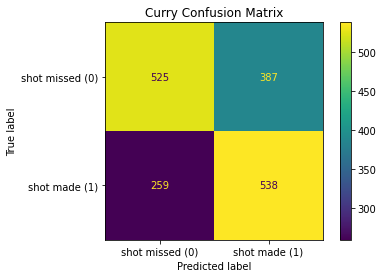

In [434]:
'''T9. Calculate precision and recall'''
# 
instructor_precision = (538)/(538 +387) 
instructor_recall = (259)/(259 +538)
print('Instuctor model precision', instructor_precision)
print('Instuctor model recall', instructor_recall)

Instuctor model precision 0.5816216216216217
Instuctor model recall 0.32496863237139273


**Task 9 Testing**

In [435]:
'''T9 Testing'''
assert isinstance(instructor_precision, float)
assert isinstance(instructor_recall, float)
assert 0 <= instructor_precision <= 1
assert 0 <= instructor_recall <= 1

**Task 10 (`stretch goal — optional`):** Plot confusion matrix for your model using your **test data**. Does your model have higher recall or higher precision? How does your model's metrics compare to the metrics you calculated above?

In [450]:
'''T10. Plot ROC curve.'''

'T10. Plot ROC curve.'